In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
#With oversampling
# Load the dataset
from collections import Counter

def overSampledSVM(csv_file): 
    data = pd.read_csv(csv_file)

    # Handle missing values
    data.fillna(data.mean(), inplace=True)

    # Separate features and labels
    X = data.iloc[:, 1:].values  # Features
    y = data.iloc[:, 0].values   # Labels

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # smote = SMOTE(random_state=42)
    # X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    try:
        X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
    except ValueError as e:
        print("SMOTE failed with:", e)
        # show dtype
        print("y_train dtype:", y_train.dtype)
        # show a few examples
        print("First 20 y_train values:", y_train[:20])
        # show unique labels
        uniques = np.unique(y_train)
        print("Unique y_train values:", uniques)
        # find any non‐integer labels
        nonints = [i for i,v in enumerate(y_train) if not float(v).is_integer()]
        print(f"Indices with non-integer labels (first 20): {nonints[:20]}")
        print("Values at those indices:", [y_train[i] for i in nonints[:20]])
        raise
    # Check label distribution after SMOTE
    print("Label distribution after SMOTE:")
    print(Counter(y_train_resampled))

    # Initialize and train SVM
    svm_model = SVC(kernel='rbf', C=0.5, gamma="scale")  # 'rbf' is default  # You can experiment with other kernels like 'rbf'
    svm_model.fit(X_train_resampled, y_train_resampled)
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.1, 1, 10],
        'kernel': ['rbf']
    }
    # grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    # grid_search.fit(X_train_resampled, y_train_resampled)
    # print("Best parameters:", grid_search.best_params_)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix (oversampled):")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report (oversampled):")
    print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

def originalSVM(csv_file):
    #Without oversampling
    data = pd.read_csv(csv_file)

    # Handle missing values
    data.fillna(data.mean(), inplace=True)

    # Separate features and labels
    X = data.iloc[:, 1:].values  # Features
    y = data.iloc[:, 0].values   # Labels

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # smote = SMOTE(random_state=42)
    # X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Check label distribution after SMOTE
    print("Label distribution after SMOTE:")
    # print(Counter(y_train_resampled))
    print(Counter(y_train))
    # Initialize and train SVM
    svm_model = SVC(kernel='rbf', C=0.5, gamma="scale")  # 'rbf' is default  # You can experiment with other kernels like 'rbf'
    svm_model.fit(X_train, y_train)
    # param_grid = {
    #     'C': [0.1, 1, 10],
    #     'gamma': ['scale', 0.1, 1, 10],
    #     'kernel': ['rbf']
    # }
    # grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    # grid_search.fit(X_train_resampled, y_train_resampled)
    # print("Best parameters:", grid_search.best_params_)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix (Original):")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report (Original):")
    print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

csv_file = "data/merged_data/all/filtered_merged_3_seconds.csv"
overSampledSVM(csv_file)
originalSVM(csv_file)

Label distribution after SMOTE:
Counter({1: 1265, 0: 1265})
Confusion Matrix (oversampled):
[[293  26]
 [ 25  69]]

Classification Report (oversampled):
              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92       319
     Class 1       0.73      0.73      0.73        94

    accuracy                           0.88       413
   macro avg       0.82      0.83      0.83       413
weighted avg       0.88      0.88      0.88       413

Label distribution after SMOTE:
Counter({0: 1265, 1: 383})
Confusion Matrix (Original):
[[313   6]
 [ 34  60]]

Classification Report (Original):
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       319
     Class 1       0.91      0.64      0.75        94

    accuracy                           0.90       413
   macro avg       0.91      0.81      0.84       413
weighted avg       0.90      0.90      0.90       413



In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score, matthews_corrcoef, f1_score
)
from collections import Counter
from imblearn.over_sampling import SMOTE
import os

def extract_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    return {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Accuracy': accuracy_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'F1_macro': f1_score(y_true, y_pred, average='macro'),
        'F1_weighted': f1_score(y_true, y_pred, average='weighted')
    }

def overSampledSVM(csv_file, timecards, n_runs=30):
    data = pd.read_csv(csv_file)
    data.fillna(data.mean(), inplace=True)
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    results = []

    for run in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

        try:
            X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
            print(f"Run {run+1}: Label distribution in training set: {Counter(y_train_resampled)}")
        except ValueError as e:
            print(f"Run {run}: SMOTE failed with: {e}")
            continue

        svm_model = SVC(kernel='rbf', C=0.5, gamma="scale")
        svm_model.fit(X_train_resampled, y_train_resampled)
        y_pred = svm_model.predict(X_test)

        metrics = extract_metrics(y_test, y_pred)
        metrics['Run'] = run + 1
        results.append(metrics)

    df = pd.DataFrame(results)
    # base = os.path.splitext(os.path.basename(csv_file))[0]
    parent = os.path.basename(os.path.dirname(csv_file))
    df.to_csv(f"results/{timecards}/svm/{parent}_oversampled_svm_metrics.csv", index=False)
    print(f"\n[Oversampled SVM] Average accuracy over {n_runs} runs: {df['Accuracy'].mean():.4f}")

def originalSVM(csv_file, timecards, n_runs=30):
    data = pd.read_csv(csv_file)
    data.fillna(data.mean(), inplace=True)
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    results = []

    for run in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
        print(f"Run {run+1}: Label distribution in training set: {Counter(y_train)}")

        svm_model = SVC(kernel='rbf', C=0.5, gamma="scale")
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)

        metrics = extract_metrics(y_test, y_pred)
        metrics['Run'] = run + 1
        results.append(metrics)

    df = pd.DataFrame(results)
    # base = os.path.splitext(os.path.basename(csv_file))[0]
    
    parent = os.path.basename(os.path.dirname(csv_file))
    df.to_csv(f"results/{timecards}/svm/{parent}_original_svm_metrics.csv", index=False)
    print(f"\n[Original SVM] Average accuracy over {n_runs} runs: {df['Accuracy'].mean():.4f}")

def runexperiments(file_extension, timecards):
    os.makedirs("results", exist_ok=True)

    all_data = "../data/merged_data/all/" + file_extension
    no_sensor = "../data/merged_data/no_sensor/" + file_extension
    no_fixation = "../data/merged_data/no_fixation/" + file_extension
    no_saccade = "../data/merged_data/no_saccade/" + file_extension
    no_velocity = "../data/merged_data/no_velocity/" + file_extension
    no_distance = "../data/merged_data/no_distance/" + file_extension
    no_personality = "../data/merged_data/no_personality/" + file_extension

    data_list = [all_data]
    # data_list = [all_data, no_sensor, no_fixation, no_saccade, no_velocity, no_distance, no_personality]
    for data in data_list:
        overSampledSVM(data, timecards)
        originalSVM(data, timecards)

runexperiments("filtered_merged_5seconds_middle.csv", "5_seconds_middle")


Run 1: Label distribution in training set: Counter({0: 1269, 1: 1269})
Run 2: Label distribution in training set: Counter({0: 1258, 1: 1258})
Run 3: Label distribution in training set: Counter({0: 1266, 1: 1266})
Run 4: Label distribution in training set: Counter({1: 1256, 0: 1256})
Run 5: Label distribution in training set: Counter({0: 1262, 1: 1262})
Run 6: Label distribution in training set: Counter({0: 1274, 1: 1274})
Run 7: Label distribution in training set: Counter({1: 1268, 0: 1268})
Run 8: Label distribution in training set: Counter({1: 1264, 0: 1264})
Run 9: Label distribution in training set: Counter({0: 1268, 1: 1268})
Run 10: Label distribution in training set: Counter({0: 1274, 1: 1274})
Run 11: Label distribution in training set: Counter({0: 1273, 1: 1273})
Run 12: Label distribution in training set: Counter({0: 1257, 1: 1257})
Run 13: Label distribution in training set: Counter({0: 1271, 1: 1271})
Run 14: Label distribution in training set: Counter({0: 1267, 1: 1267})
R

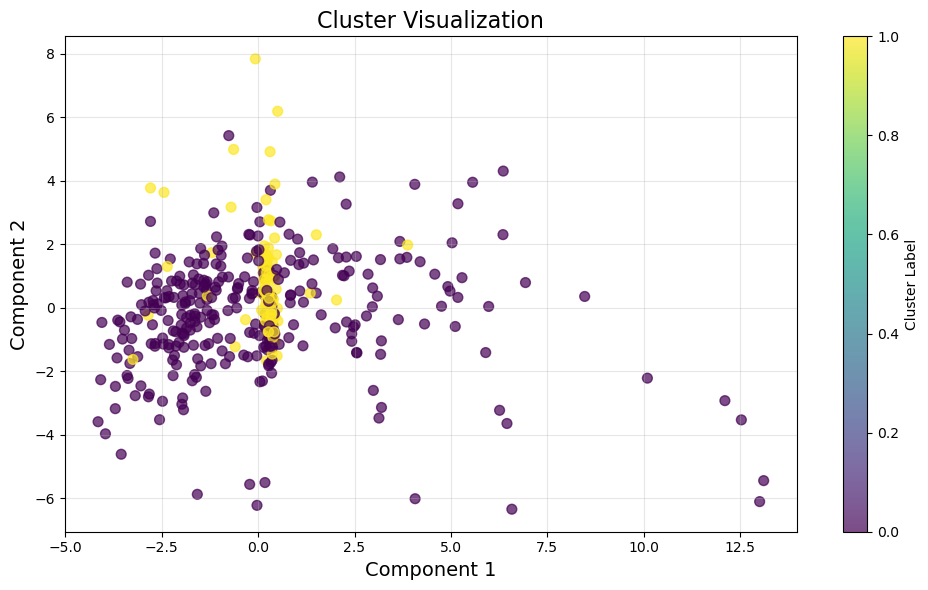

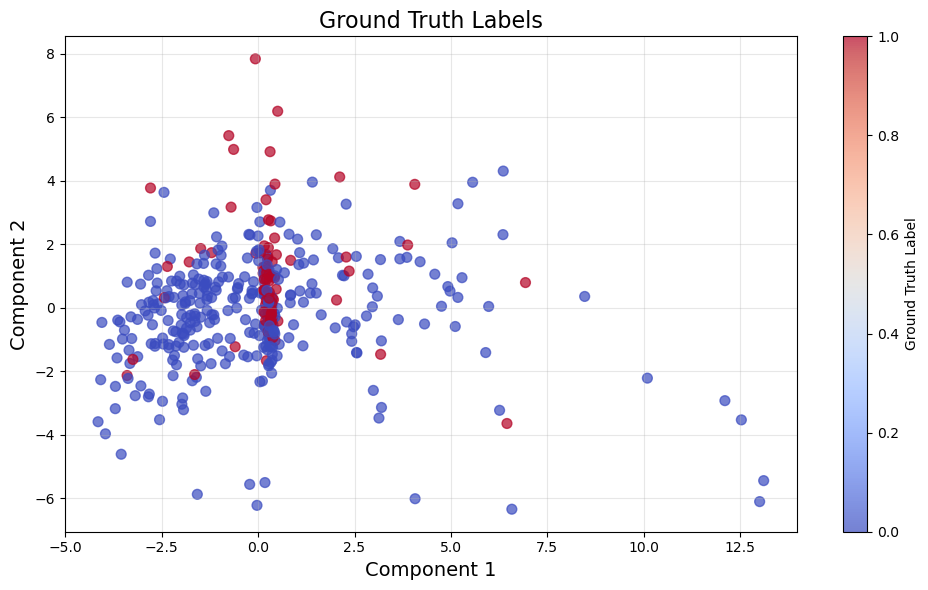

In [4]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)  # X_scaled is your input data

import matplotlib.pyplot as plt

# Visualize clusters
plt.figure(figsize=(10, 6))

# Scatter plot with colors based on cluster labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)

# Add titles and labels
plt.title("Cluster Visualization", fontsize=16)
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.colorbar(label="Cluster Label")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

# Compare with ground truth
plt.figure(figsize=(10, 6))

# Scatter plot with colors based on ground truth labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap='coolwarm', s=50, alpha=0.7)

# Add titles and labels
plt.title("Ground Truth Labels", fontsize=16)
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.colorbar(label="Ground Truth Label")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()



